# Association between two random variables

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
# Import the housing information for analysis 

housing = pd.DataFrame.from_csv('../data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
# Use covariance to calculate the association

housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [6]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


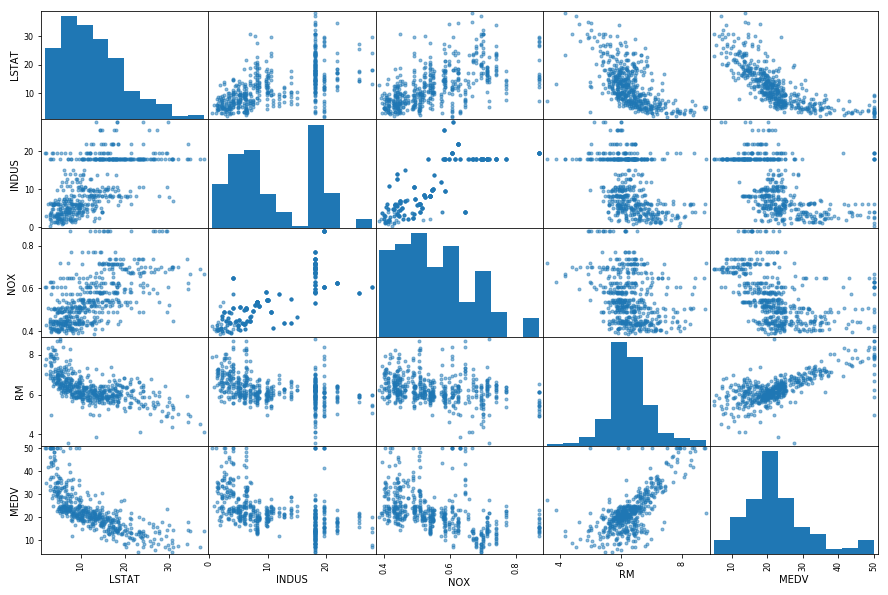

In [4]:
# scatter matrix plot
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(15, 10))

## Let's do an analysis by yourself!

## Observe the association between LSTAT and MEDV:

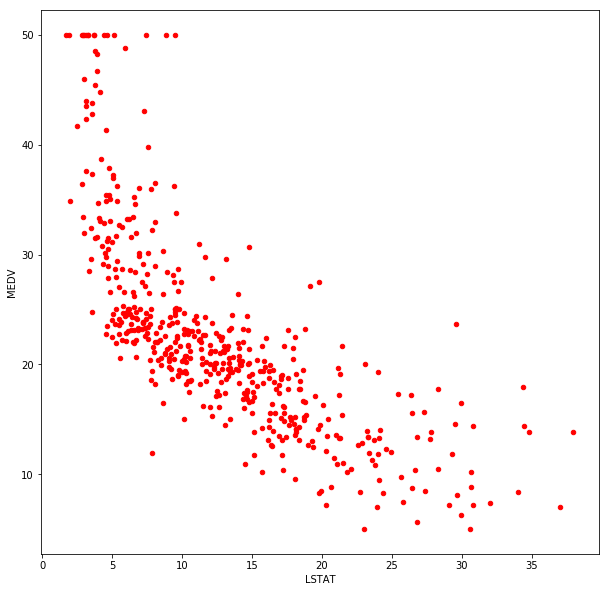

In [14]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='red')

In [15]:
b_0 = 1
b_1 = 2
housing['GuessResponse'] = b_0 + b_1 * housing['RM']

In [9]:
import statsmodels.formula.api as smf

In [51]:
# treinamento do modelo
model = smf.ols(formula = 'MEDV~RM', data = housing).fit()

In [52]:
b_0 = model.params[0]
b_1 = model.params[1]
housing['BestResponse'] = b_0 + b_1 * housing['RM']

In [16]:
housing.head(10)

,LSTAT,INDUS,NOX,RM,MEDV,BestResponse,GuessResponse
0,4.98,2.31,0.538,6.575,24.0,-262.629952,14.150
1,9.14,7.07,0.469,6.421,21.6,-257.290677,13.842
2,4.03,7.07,0.469,7.185,34.7,-283.779031,15.370
3,2.94,2.18,0.458,6.998,33.4,-277.295625,14.996
4,5.33,2.18,0.458,7.147,36.2,-282.461547,15.294
5,5.21,2.18,0.458,6.430,28.7,-257.602712,13.860
6,12.43,7.87,0.524,6.012,22.9,-243.110393,13.024
7,19.15,7.87,0.524,6.172,27.1,-248.657692,13.344
8,29.93,7.87,0.524,5.631,16.5,-229.900886,12.262
9,17.10,7.87,0.524,6.004,18.9,-242.833028,13.008


In [53]:
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']
indices = [7, 20, 100]
print(housing['observederror'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observederror, dtype: float64


In [49]:

print('Sum of squared error is', (housing['observederror'] ** 2).sum())

Sum of squared error is 75291.322588


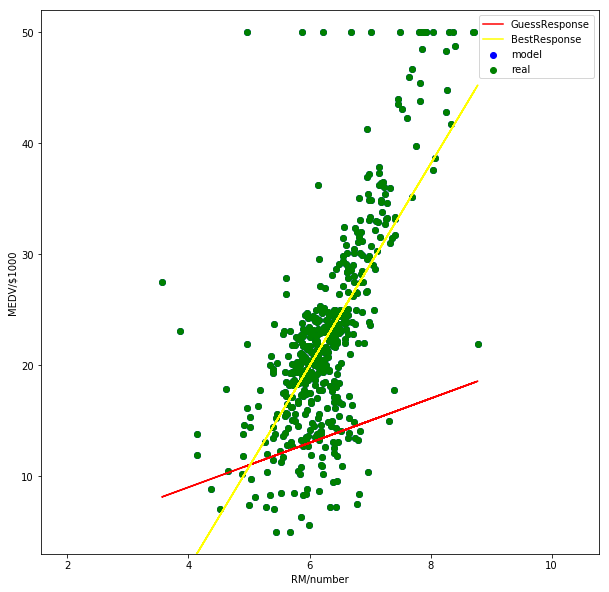

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(housing['RM'], housing['MEDV'], color='b', label='model')
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real')
plt.plot(housing['RM'], housing['GuessResponse'], color='red')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow')
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
plt.xlim(np.min(housing['RM']) - 2, np.max(housing['RM']) + 2)
plt.ylim(np.min(housing['MEDV']) - 2, np.max(housing['MEDV']) + 2)
plt.legend()
plt.show()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.49e-74
Time:                        21:52:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""